In [1]:
import numpy as np
import matplotlib.pyplot as plt
    
%matplotlib inline  

In [2]:
max_tube_dist = 5.0
min_dist = 0.8

pixels_on_diam = 10
tube_diam = 0.0145

pixel_size = 3.45e-6
sensor_dim = np.array([2448,2048])

sensor_diag = 0.011 #2/3" sensor
sensor_size = np.array([0.0088, 0.0066])

focal_length = 0.017

In [3]:
FOV = np.degrees(2 * np.arctan(sensor_size/(focal_length)))
print ("FOV ={}".format(FOV))

FOV =[ 54.73642086  42.43593915]


In [4]:
FOV_linear = ((2*np.pi*max_tube_dist)/360)*FOV
print ("FOV @ {}m = {}".format (max_tube_dist,FOV_linear))

FOV @ 5.0m = [ 4.77665382  3.7032343 ]


In [5]:
length_per_pixel = FOV_linear / sensor_dim
print ("Length per pixel={}m".format(length_per_pixel))
pixels_on_diam = tube_diam / length_per_pixel
print ("Pixels on tube diam ={}".format(pixels_on_diam))

Length per pixel=[ 0.00195125  0.00180822]m
Pixels on tube diam =[ 7.4311435   8.01893632]


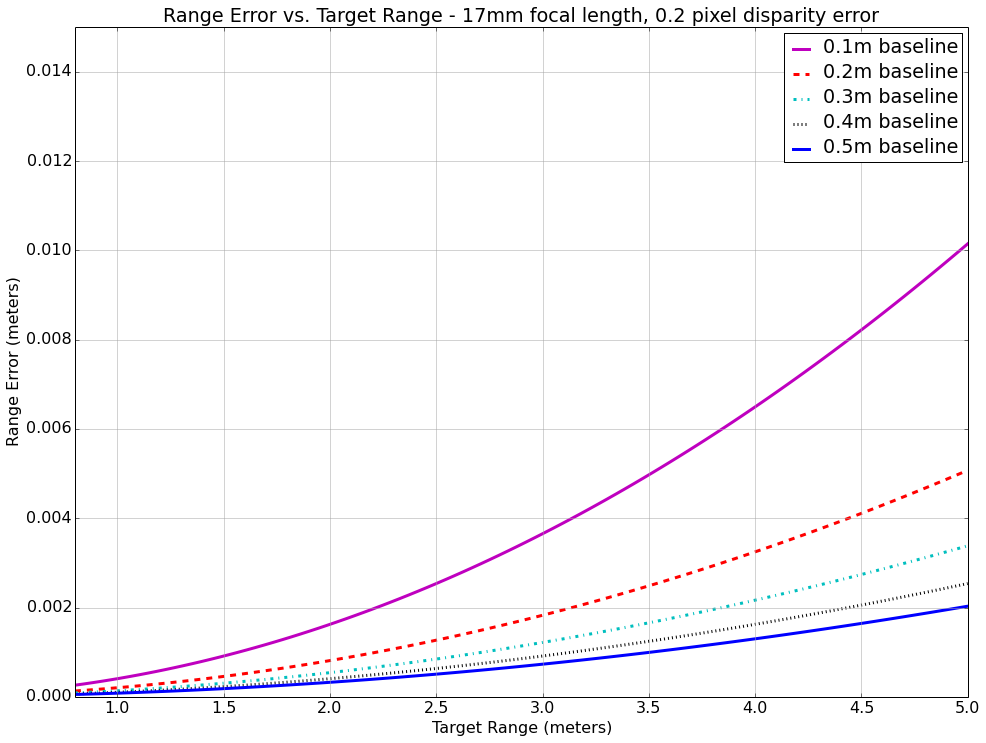

In [6]:
z = np.linspace(min_dist, max_tube_dist, num = 100)
disp_accuracy = pixel_size * 0.2   #One fifth pixel disparity accuracy
baselines = np.array([0.10, 0.20, 0.30, 0.4, 0.5])

fig = plt.figure(figsize=(16,12))
labels = ["0.1m baseline","0.2m baseline","0.3m baseline","0.4m baseline","0.5m baseline"]
colors = ['m','r','c','k','b']
linestyles = ['-','--','-.',':','-']
for k,(linestyle, color, label, baseline) in enumerate(zip(linestyles, colors, labels, baselines)):
    d_res = z**2 / (focal_length*baseline)*disp_accuracy
    plt.plot(z,d_res,color=color,linestyle=linestyle,lw=3, label=label)

plt.legend(loc=0)
plt.xlim (min_dist,max_tube_dist)
plt.ylim (0,0.015)
plt.ylabel ("Range Error (meters)")
plt.xlabel ("Target Range (meters)")
plt.title ("Range Error vs. Target Range - 17mm focal length, 0.2 pixel disparity error")
plt.rcParams.update({'font.size': 16})
plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()


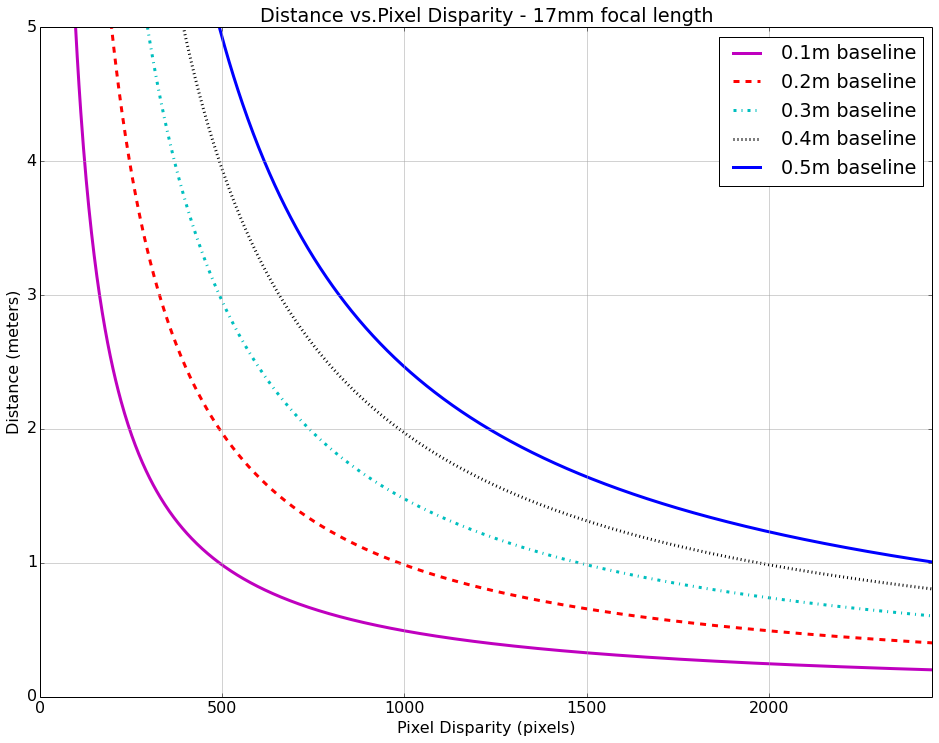

In [7]:


disparity = np.linspace(0.1*pixel_size, sensor_dim[0]*pixel_size, num = 1000)
baselines = np.array([0.1, 0.20, 0.30, 0.4, 0.5])

fig = plt.figure(figsize=(16,12))

labels = ["0.1m baseline","0.2m baseline","0.3m baseline","0.4m baseline","0.5m baseline"]
colors = ['m','r','c','k','b']
linestyles = ['-','--','-.',':','-']
for k,(linestyle, color, label, baseline) in enumerate(zip(linestyles, colors, labels, baselines)):
    depth_val = (focal_length*baseline)/disparity
    plt.plot(disparity/pixel_size,depth_val,color=color,linestyle=linestyle,lw=3, label=label)

plt.legend(loc=0)
plt.xlim (0, sensor_dim[0])
plt.ylim (0,max_tube_dist)
plt.ylabel ("Distance (meters)")
plt.xlabel ("Pixel Disparity (pixels)")
plt.title ("Distance vs.Pixel Disparity - 17mm focal length")
plt.rcParams.update({'font.size': 16})
plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()
